In [1]:
## Load libraries
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.preprocessing

#Various machinie learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


dataset = pd.read_csv('data/nbadata2001 - nbadata2001.csv')
conferences = pd.read_csv('conferences.csv')


for i in range(2002,2020):
    d = pd.read_csv('data/nbadata' + str(i)+ ' - nbadata' + str(i) + '.csv')
    dataset = pd.concat([dataset,d])
    
dataWithConferences = pd.merge(dataset, conferences, on="Totals")

eastData = dataWithConferences.loc[dataWithConferences['Conference']=='East',:]
print(eastData)
westData = dataWithConferences.loc[dataWithConferences['Conference']=='West',:]
print (westData)
  
    



            Totals  GP   MPG   FGM   FGA    FG%  3:00 PM   3PA    3P%   FTM  \
0    Atlanta Hawks  82  48.1  35.1  81.3  0.431      4.1  11.4  0.357  16.8   
1    Atlanta Hawks  82  48.2  35.4  80.6  0.439      5.2  14.6  0.354  18.1   
2    Atlanta Hawks  82  48.5  34.9  78.5  0.444      4.9  13.9  0.352  19.4   
3    Atlanta Hawks  82  48.5  34.5  79.6  0.433      5.1  15.2  0.335  18.7   
4    Atlanta Hawks  82  48.4  35.9  81.4  0.441      3.7  11.9  0.312  17.3   
..             ...  ..   ...   ...   ...    ...      ...   ...    ...   ...   
561  Brooklyn Nets  82  48.6  37.4  83.0  0.451      6.6  19.9  0.331  16.6   
562  Brooklyn Nets  82  48.2  38.2  84.4  0.453      6.5  18.4  0.352  15.7   
563  Brooklyn Nets  82  48.2  37.8  85.2  0.444     10.7  31.6  0.338  19.4   
564  Brooklyn Nets  82  48.4  38.2  86.8  0.441     12.7  35.7  0.356  17.4   
565  Brooklyn Nets  82  48.7  40.3  89.7  0.449     12.8  36.2  0.353  19.0   

     ...  o-TRB  o-APG  o-SPG  o-BPG  o-PPG  Playof

In [2]:
dataset2021 = pd.read_csv('../nbadata2021.csv')
dataset2021full = pd.read_csv('../nbadata2021-full.csv')


data2021WithConferences = pd.merge(dataset2021, conferences, on="Totals")

data2021FullWithConferences = pd.merge(dataset2021full, conferences, on="Totals")

In [3]:
eastData2021Half = data2021WithConferences.loc[data2021WithConferences['Conference']=='East',:]
eastData2021Full = data2021WithConferences.loc[data2021FullWithConferences['Conference']=='East',:]
westData2021Half = data2021WithConferences.loc[data2021WithConferences['Conference']=='West',:]
westData2021Full = data2021WithConferences.loc[data2021FullWithConferences['Conference']=='West',:]


In [4]:
westDataArray = westData.values
westStats = westDataArray[:,2:41]
westPlayoffs = westDataArray[:,41]
westCF = westDataArray[:,42]
westFinals = westDataArray[:,43]
westNBAChampions = westDataArray[:,44]

print(westStats)

[[48.3 37.6 81.9 ... 7.6 4.6 96.2]
 [48.5 39.0 84.5 ... 7.2 4.6 101.0]
 [48.2 38.5 85.1 ... 6.7 3.9 95.2]
 ...
 [48.3 39.5 87.4 ... 8.5 5.5 105.8]
 [48.4 39.9 88.1 ... 7.7 4.6 104.4]
 [48.4 42.6 94.0 ... 8.2 5.1 111.1]]


In [5]:
print(eastStats2021)

NameError: name 'eastStats2021' is not defined

In [6]:
westDataArray = westData.values
westStats = westDataArray[:,2:41]
westPlayoffs = westDataArray[:,41]
westCF = westDataArray[:,42]
westFinals = westDataArray[:,43]
westNBAChampions = westDataArray[:,44]

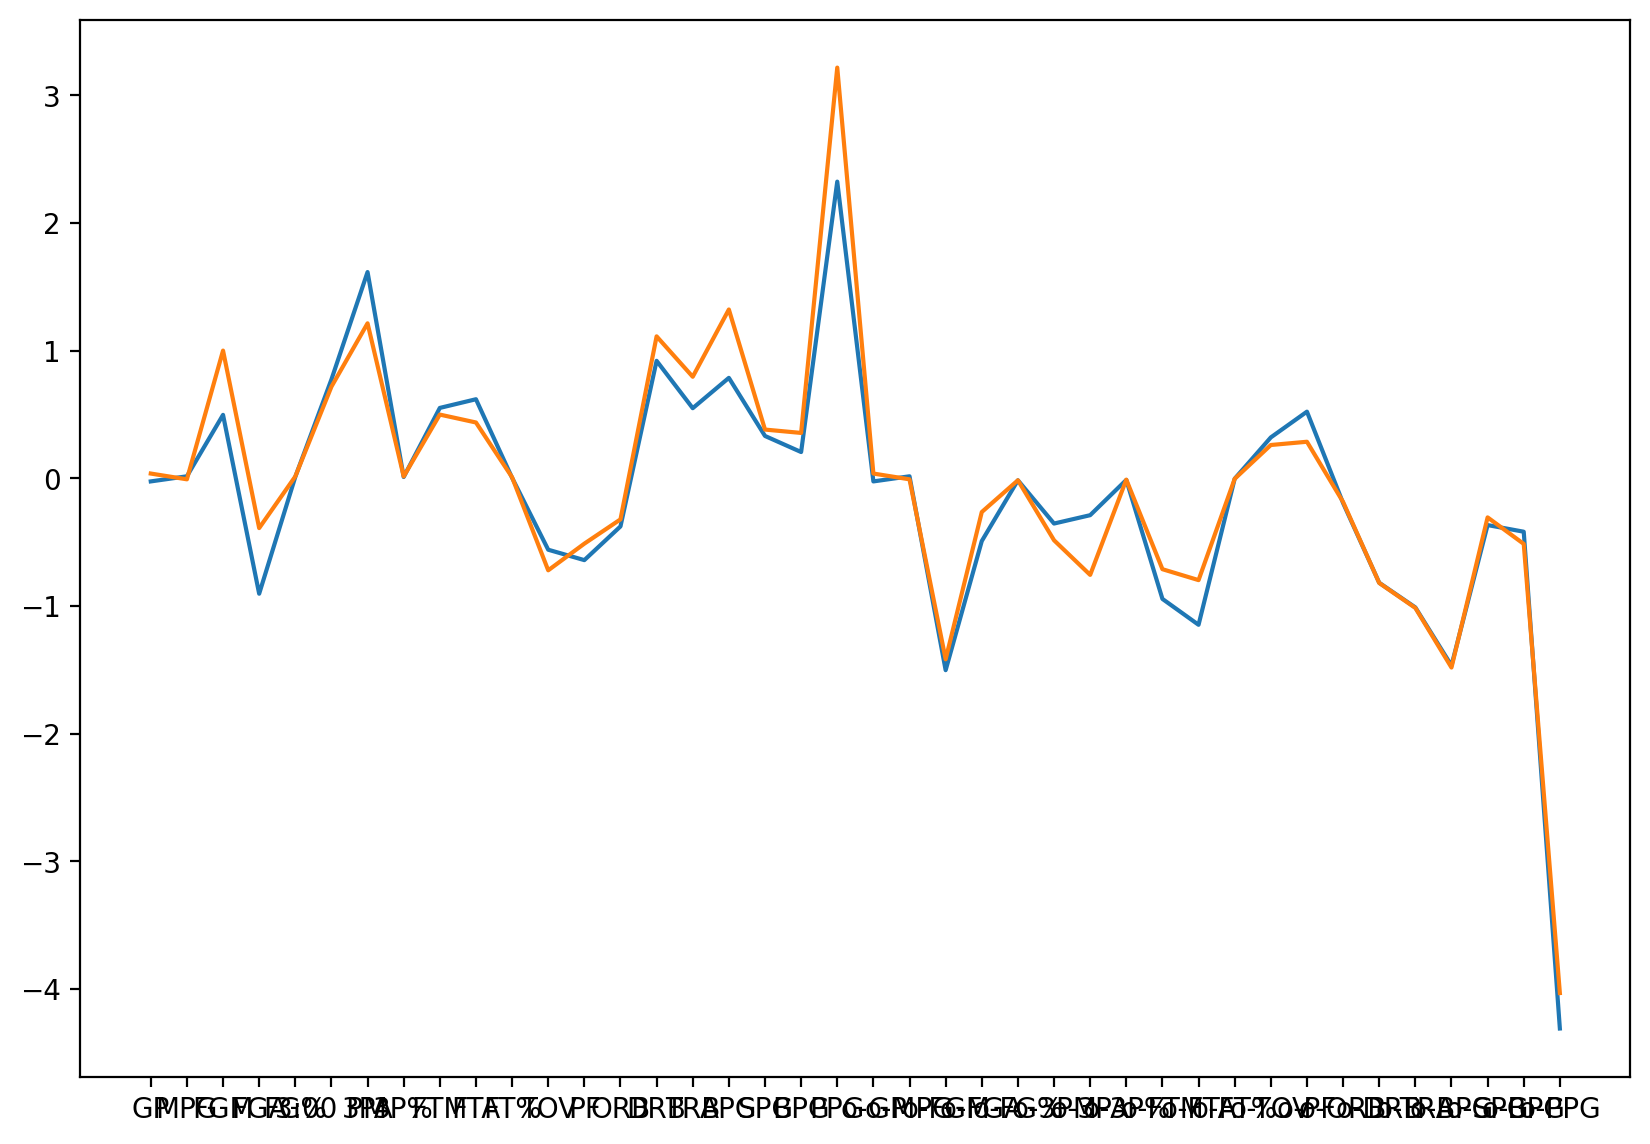

In [7]:

eastPlayoffTeams = eastData.loc[eastData['Playoffs']==1,:]
westPlayoffTeams = westData.loc[westData['Playoffs']==1,:]
eastNonPlayoffTeams = eastData.loc[eastData['Playoffs']==0,:]
westNonPlayoffTeams = westData.loc[westData['Playoffs']==0,:]

epm = eastPlayoffTeams.mean(axis=0)
enpm = eastNonPlayoffTeams.mean(axis=0)

wpm = westPlayoffTeams.mean(axis=0)
wnpm = westNonPlayoffTeams.mean(axis=0)


fig=plt.figure(figsize=(10,7), dpi= 200, facecolor='w', edgecolor='k')

plt.plot(epm[0:40]-enpm[0:40])

plt.plot(wpm[0:40]-wnpm[0:40])
#plt.plot(npm[0:10])
plt.show()




In [9]:
eastConferenceChampions = eastData.loc[eastData['Finals']==1,:]

eastPlayoffTeams = eastData.loc[eastData['Playoffs']==1,:]


westConferenceChampions = westData.loc[westData['Finals']==1,:]



In [10]:
westArray = westData.values
westStats = westArray[:,2:41]
westPlayoffs = westArray[:,41]
westCF = westArray[:,42]
westFinals = westArray[:,43]
Champions = westArray[:,44]

In [11]:

validation_size = 0.25
seed = 2
scoring = 'accuracy'
west_stats_train, west_stats_validation, west_playoffs_train, west_playoffs_validation = model_selection.train_test_split(westStats, westPlayoffs, test_size=validation_size, random_state=seed)


In [12]:
validation_size = 0.30
seed = 2
scoring = 'accuracy'
west_stats_train_finals, west_stats_validation_finals, west_finals_train, west_finals_validation = model_selection.train_test_split(westStats, westFinals, test_size=validation_size, random_state=seed)


### print(stats_train.shape)
print(CF_validation.shape)

#Y_train=Y_train.astype('float')
#Y_validation = Y_validation.astype('float')

In [13]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA',QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

west_playoffs_train= west_playoffs_train.astype('float')
west_playoffs_validation = west_playoffs_validation.astype('float')


results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=2)
	cv_results = model_selection.cross_val_score(model, west_stats_train, west_playoffs_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.886792 (0.009434)
LDA: 0.877358 (0.028302)
QDA: 0.650943 (0.047170)
KNN: 0.773585 (0.018868)
CART: 0.750000 (0.004717)
NB: 0.787736 (0.033019)
SVM: 0.778302 (0.004717)


/Users/rameshnarasimhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/rameshnarasimhan/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
nb = GaussianNB()
nb.fit(west_stats_train, west_playoffs_train)
predictions = nb.predict(west_stats_validation)
print(accuracy_score(west_playoffs_validation, predictions))
print(confusion_matrix(west_playoffs_validation, predictions))
print(classification_report(west_playoffs_validation, predictions))


0.8873239436619719
[[21  4]
 [ 4 42]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84        25
         1.0       0.91      0.91      0.91        46

    accuracy                           0.89        71
   macro avg       0.88      0.88      0.88        71
weighted avg       0.89      0.89      0.89        71



In [18]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')


west_playoffs_train= west_playoffs_train.astype('float')
west_playoffs_validation = west_playoffs_validation.astype('float')

lr.fit(west_stats_train, west_playoffs_train)
predictions = lr.predict(west_stats_validation)
print(accuracy_score(west_playoffs_validation, predictions))
print(confusion_matrix(west_playoffs_validation, predictions))
print(classification_report(west_playoffs_validation, predictions))
print(lr.coef_)

0.9154929577464789
[[23  2]
 [ 4 42]]
              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88        25
         1.0       0.95      0.91      0.93        46

    accuracy                           0.92        71
   macro avg       0.90      0.92      0.91        71
weighted avg       0.92      0.92      0.92        71

[[ 1.71220200e-01  2.10709712e-01 -1.66982217e-02  1.00533090e-02
   1.70711801e-01  1.52497839e-02  1.28160585e-02  4.73355253e-01
  -5.43842316e-02  3.85617713e-02 -7.41623509e-01 -3.27372054e-01
  -8.29078542e-02 -4.77507315e-02 -1.52309033e-01  4.81288081e-01
  -4.55732157e-02 -8.35285037e-02  1.12907114e+00 -9.09907550e-02
   1.71220200e-01 -9.33981767e-01  6.03917300e-01 -9.62313128e-03
   8.91283639e-02  2.26848320e-01  1.15361546e-03  3.94249183e-01
   5.13807915e-01  2.72926251e-03  5.48849562e-01 -1.26304819e-01
  -4.96199591e-01  1.81987836e-01 -4.38064514e-01  3.28475010e-01
   4.95957570e-01  3.94552333e-01 -1.6088

In [16]:
lr_finals = LogisticRegression(solver='liblinear', multi_class='ovr')

#from sklearn import preprocessing

#X_scaled = preprocessing.scale(X_train)
#min_max_scaler = preprocessing.MinMaxScaler()
#X_normed = min_max_scaler.fit_transform(X_train)

#X_validation_normed = min_max_scaler.fit_transform(X_validation)


west_finals_train= west_finals_train.astype('float')
west_finals_validation = west_finals_validation.astype('float')

lr_finals.fit(west_stats_train_finals, west_finals_train)
predictions = lr_finals.predict(west_stats_validation_finals)
print(accuracy_score(west_finals_validation, predictions))
print(confusion_matrix(west_finals_validation, predictions))
print(classification_report(west_finals_validation, predictions))
print(lr_finals.coef_)


0.8705882352941177
[[72  6]
 [ 5  2]]
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        78
         1.0       0.25      0.29      0.27         7

    accuracy                           0.87        85
   macro avg       0.59      0.60      0.60        85
weighted avg       0.88      0.87      0.87        85

[[ 0.02823251  0.12525233  0.50348671 -0.00559583 -0.39051276  0.1185876
  -0.05954508  0.50039932  0.03029524  0.01670726 -0.64808384 -0.0381098
  -0.24132072 -0.18611353 -0.42708684  0.1701876   0.80760784  1.19947404
   0.47124235 -0.13587166  0.02823251 -0.22056338  0.44551484 -0.00871131
  -0.54706875  0.16083266 -0.0221022   0.20788793 -0.24889396  0.00815994
  -0.43371112  0.15279651 -0.58949124 -0.02510829 -0.56596147 -0.27729462
   0.04890882 -0.6455556  -0.62927961]]


[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
Dallas Mavericks
Denver Nuggets
Golden State
Houston Rockets
Los Angeles
Los Angeles
Memphis Grizzlies
Minnesota Timberwolves
New Orleans
Phoenix Suns
Portland Trail
Sacramento Kings
San Antonio
Utah Jazz
Oklahoma City
[9.91572724e-01 9.99998644e-01 9.99867139e-01 4.26636126e-02
 9.99948694e-01 9.99983572e-01 9.99943636e-01 9.72174038e-05
 9.91643608e-01 9.99999480e-01 7.47958438e-01 7.06093855e-04
 9.67659352e-01 9.99997165e-01 2.62298173e-03]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]


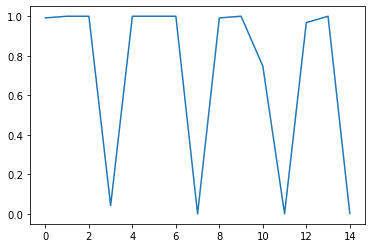

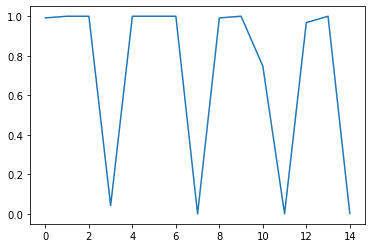

In [19]:
westArray2021Half = westData2021Half.values
westArray2021Full = westData2021Full.values
westArray2021HalfStats = westArray2021Half[:,2:41]
westArray2021FullStats = westArray2021Full[:,2:41]
westPredictions2021Playoffs = lr.predict(westArray2021HalfStats)
print(westPredictions2021Playoffs)

for i in range(0,len(westArray2021Half[:,0])):
    
    print(westArray2021Half[i,0])
    
    
playoffProbs = lr.predict_proba(westArray2021HalfStats)
probs = playoffProbs[:,1]

print(probs)

playoffFullProbs=lr.predict_proba(westArray2021FullStats)
pfProbs = playoffProbs[:,1]

westPredictions2021Finals = lr.predict(westArray2021FullStats)
print(westPredictions2021Finals)


#finalsProbs = lr_finals.predict_proba(westArray2021FullStats)
#fProbs = finalsProbs[:,1]



#westArray2021full = westData2021Full.values
#westChampionpredictions2021full = lr_cf.predict(array2021full[:,2:41])

#print(CFpredictions2021full)

#CF_probs = lr_cf.predict_proba(array2021full[:,2:41])

#probs = CF_probs[:,1]

plt.plot(probs)
plt.show()

plt.plot(pfProbs)



### print(eastArray2021stats)

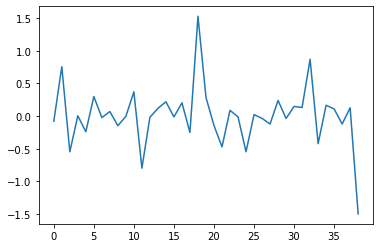

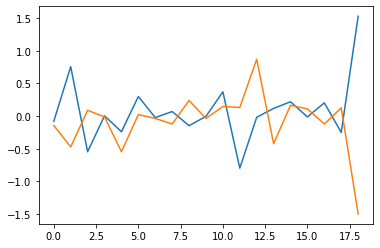

In [37]:

from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train)
min_max_scaler = preprocessing.MinMaxScaler()
eastStats_normed = min_max_scaler.fit_transform(eastStats_train)

X_validation_normed = min_max_scaler.fit_transform(X_validation)


In [1]:
import numpy as np
c = np.cov(np.transpose(stats_normed))

NameError: name 'stats_normed' is not defined

### 2

In [36]:
import seaborn as sns

In [37]:
cols = playoff_teams.keys()

NameError: name 'playoff_teams' is not defined

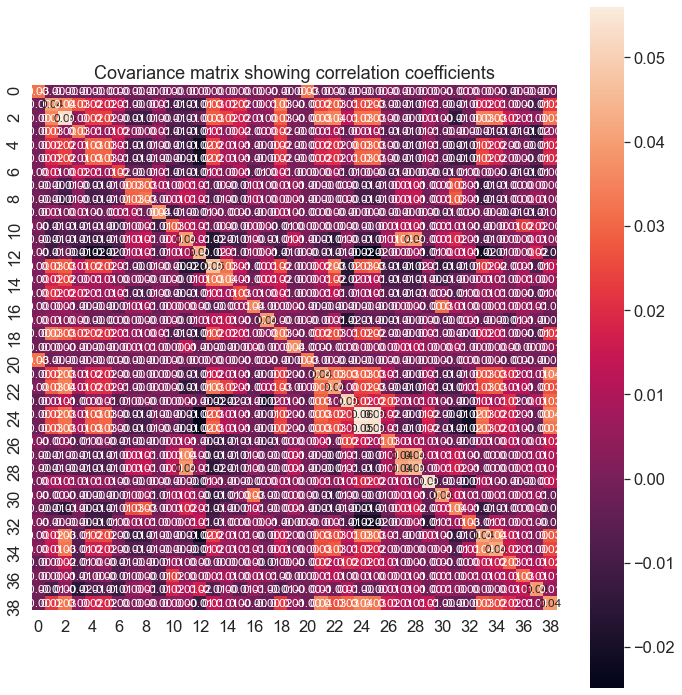

In [38]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(c,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12}
                 )
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [39]:
L = np.linalg.eig(c)

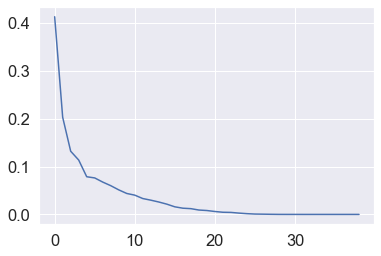

In [40]:
plt.plot(L[0])

[-0.00666195 -0.02429118 -0.02297373  0.07118317  0.19109578  0.29062087
  0.31008621 -0.49889688 -0.03436803 -0.02072519 -0.09243237  0.03600967
 -0.01666279  0.07197419  0.02297014 -0.07839006  0.02435858  0.05107407
 -0.02463428  0.00782458 -0.00618719  0.03425791 -0.03896842  0.02727857
  0.004482   -0.00802511 -0.01877569 -0.00381253  0.01899189 -0.22693217
  0.59462419  0.01703675  0.03375848 -0.21126968  0.01122183  0.08619378
  0.11508869 -0.09409973  0.12331364]


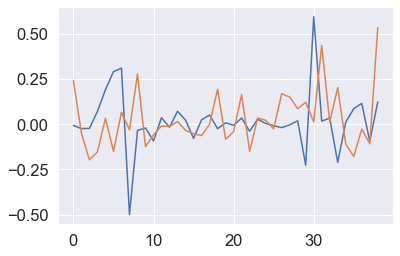

In [81]:
plt.plot(L[1][0])
plt.plot(L[1][1])
print(L[1][0])





In [164]:
mi = []


for x in dataset.keys():

    mi.append(sklearn.metrics.mutual_info_score(dataset[x],dataset['Playoffs']))
    print(x+ ": " + str(sklearn.metrics.mutual_info_score(dataset[x],dataset['Playoffs'])))

Totals: 0.15223394769346565
GP: 0.004212483976954576
MPG: 0.015610072917078624
FGM: 0.18644585672136102
FGA: 0.27733288275755574
FG%: 0.21163254016713506
3PM: 0.21180579911386066
3PA: 0.3975651998677346
3P%: 0.23960389053402553
FTM: 0.1415226213072203
FTA: 0.186311775394652
FT%: 0.252280200291547
TOV: 0.12719166084225622
PF: 0.1646676687711785
ORB: 0.1423145362450598
DRB: 0.1931646149270444
TRB: 0.16658607895541105
APG: 0.2015790298759198
SPG: 0.09580977725878703
BPG: 0.11427050800614333
PPG: 0.35187654784179506
o-GP: 0.004212483976954576
o-MPG: 0.015610072917078624
o-FGM: 0.22566947681845617
o-FGA: 0.2595699509694218
o-FG%: 0.27855875116245127
o-3PM: 0.14876813981549683
o-3PA: 0.31116733345747627
o-3P%: 0.1982549094121462
o-FTM: 0.1776490236943457
o-FTA: 0.17727582157478616
o-FT%: 0.12557175178438007
o-TOV: 0.11508939394305073
o-PF: 0.10244440732927157
o-ORB: 0.08152800665168147
o-DRB: 0.1603387811708754
o-TRB: 0.21090817951038632
o-APG: 0.2538134050681845
o-SPG: 0.07104098932211547
o

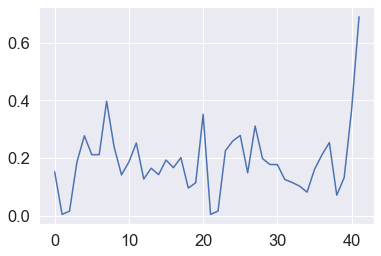

In [153]:
plt.plot(mi)


In [32]:
fga

0      17.7
1      17.5
2      16.2
3      13.0
4      19.3
       ... 
295    33.8
296    34.0
297    33.3
298    32.6
299    36.2
Name: 3PA, Length: 300, dtype: float64

In [92]:
print(dataset.describe())

               GP         MPG         FGM         FGA         FG%         3PM  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean    80.393333   48.352000   38.173333   83.818667    0.455493    8.207000   
std      4.806485    0.183325    1.945191    3.283492    0.015521    2.250957   
min     66.000000   48.000000   33.200000   75.800000    0.408000    3.800000   
25%     82.000000   48.200000   36.900000   81.600000    0.444000    6.400000   
50%     82.000000   48.400000   38.100000   83.600000    0.454000    8.000000   
75%     82.000000   48.500000   39.200000   86.100000    0.465250    9.825000   
max     82.000000   49.000000   44.000000   94.000000    0.503000   16.100000   

              3PA         3P%         FTM         FTA  ...       o-TOV  \
count  300.000000  300.000000  300.000000  300.000000  ...  300.000000   
mean    23.052667    0.354887   17.561667   23.121333  ...   14.345000   
std      5.997806    0.018473    1.855147    2.3

In [26]:
print(nbaseason2.describe())


             Totals    GP   MPG   FGM   FGA    FG%  3PM   3PA    3P%   FTM  \
count            28    28    28    28    28     28   28    28     28    28   
unique           27     1     7    23    23     23   23    27     25    18   
top     Los Angeles  82.0  48.4  37.4  82.4  0.461  6.3  15.3  0.342  17.7   
freq              2    28     8     2     2      3    2     2      2     3   

        ... o-TOV  o-PF o-ORB o-DRB o-TRB o-APG o-SPG o-BPG  o-PPG Playoffs  
count   ...    28    28    28    28    28    28    28    28     28       28  
unique  ...    20    20    20    21    24    23    16    17     26        2  
top     ...  13.7  20.7  10.5  29.1  40.7  21.7   7.5   4.6  104.7        0  
freq    ...     3     3     3     3     2     2     4     4      2       14  

[4 rows x 42 columns]


In [129]:
print(dataset.groupby('Playoffs').size())

Playoffs
0    140
1    160
dtype: int64


In [31]:
nbaseason.hist()
plt.show()

ValueError: hist method requires numerical columns, nothing to plot.

In [33]:
type(nbaseason.iloc[28,10])

str

In [34]:
nbaseason.iloc[28,10]

'23.1'

In [45]:
nbaseason2PPG = pandas.to_numeric(nbaseason2['PPG'], errors='coerce')

AttributeError: module 'matplotlib.pyplot' has no attribute 'shw'

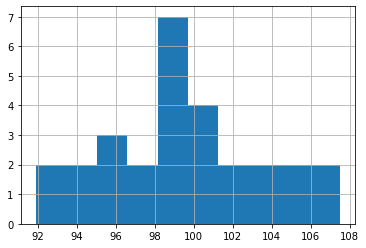

In [47]:
type(nbaseasonPPG)
nbaseason2PPG.hist()
plt.shw()

In [163]:
for i in range(1,41):
    dataset_tmp = pandas.to_numeric(dataset.iloc[:,i], errors='coerce')
    
    dataset.loc[:,i] = dataset_tmp
  
    


In [125]:
array = dataset.values
X = array[:,2:41]
Y = array[:,41]



imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)

validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_validation)
print(Y_validation)

print (X_validation.shape)

[[48.6 38.8 85.3 ... 7.5 4.6 102.9]
 [48.5 37.4 80.4 ... 7.4 5.0 101.3]
 [48.1 38.1 81.7 ... 7.4 4.9 97.1]
 ...
 [48.4 40.7 87.7 ... 8.2 4.7 108.0]
 [48.3 39.9 88.8 ... 6.7 4.1 102.5]
 [48.5 38.8 85.8 ... 7.9 4.1 103.3]]
[1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0]
(60, 39)


In [79]:
nbaseason_clean = nbaseason.drop(nbaseason.index[[9,12]])

In [109]:
dataset.to_csv('dataset.csv')

In [134]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.866667 (0.048591)
LDA: 0.820833 (0.072289)
KNN: 0.783333 (0.066667)
CART: 0.704167 (0.068338)
NB: 0.862500 (0.041874)
SVM: 0.833333 (0.079057)


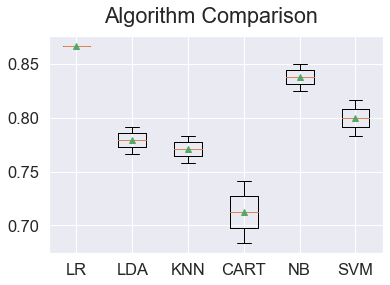

In [154]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans = True)
ax.set_xticklabels(names)
plt.show()

In [155]:
svm = SVC(gamma='auto')
svm.fit(X_normed, Y_train)
predictions = svm.predict(X_validation_normed)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.8533333333333334
[[51 17]
 [ 5 77]]
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82        68
         1.0       0.82      0.94      0.88        82

    accuracy                           0.85       150
   macro avg       0.86      0.84      0.85       150
weighted avg       0.86      0.85      0.85       150



In [112]:
print(X)

[[48.4 38.8 82.9 ... 21.0 6.2 4.4]
 [48.2 37.1 76.8 ... 19.3 7.0 4.7]
 [48.5 34.9 76.9 ... 20.3 7.5 6.1]
 ...
 [48.6 42.1 90.1 ... 26.2 7.7 4.6]
 [48.4 42.6 94.0 ... 24.9 8.2 5.1]
 [48.7 40.3 89.7 ... 23.7 7.8 5.3]]


In [159]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_normed, Y_train)
predictions = knn.predict(X_validation_normed)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.7466666666666667
[[56 12]
 [26 56]]
              precision    recall  f1-score   support

         0.0       0.68      0.82      0.75        68
         1.0       0.82      0.68      0.75        82

    accuracy                           0.75       150
   macro avg       0.75      0.75      0.75       150
weighted avg       0.76      0.75      0.75       150



In [2]:
lr2 = LogisticRegression(solver='liblinear', multi_class='ovr')

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
stats_normed = min_max_scaler.fit_transform(stats_train)

stats_validation_normed = min_max_scaler.fit_transform(stats_validation)

lr2.fit(stats_normed, playoffs_train)
predictions = lr2.predict(stats_validation_normed)
print(accuracy_score(playoffs_validation, predictions))
print(confusion_matrix(playoffs_validation, predictions))
print(classification_report(playoffs_validation, predictions))
print(lr2.coef_)

NameError: name 'LogisticRegression' is not defined

In [157]:
X_train=X_train.astype('float')

In [132]:
Y_train=Y_train.astype('float')
Y_validation = Y_validation.astype('float')
X_validation = X_validation.astype('float')

In [265]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')

from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train)
min_max_scaler = preprocessing.MinMaxScaler()
X_normed = min_max_scaler.fit_transform(X_train)

X_validation_normed = min_max_scaler.fit_transform(X_validation)

lr.fit(X_normed, Y_train)
predictions = lr.predict(X_validation_normed)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(lr.coef_)


0.8166666666666667
[[19  4]
 [ 7 30]]
              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        23
         1.0       0.88      0.81      0.85        37

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60

[[ 0.31432677  1.0670277  -0.18065328  1.78346962  1.29028138  1.00264575
   1.18919849  0.8898481   0.78429351  0.60862315 -0.83936287 -0.32524284
  -0.37652035  0.85236239  0.65094707  0.67926633  1.35086706  0.06083
   1.5006451   0.52530423  0.31432677 -1.3867687   0.06847781 -2.19131113
  -0.73577414 -0.33352948 -1.45386472 -0.65888281 -0.57141033 -0.74599605
   0.82836564  0.73207807 -0.17658084 -0.93148671 -0.89324264 -1.6332989
  -0.85144758 -1.17347957 -1.27095528]]


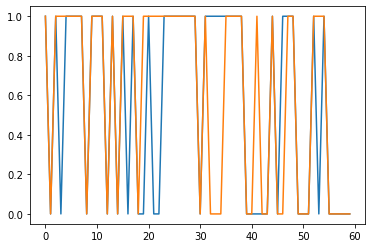

In [51]:
plt.plot(predictions)
plt.plot(Y_validation)
plt.show()

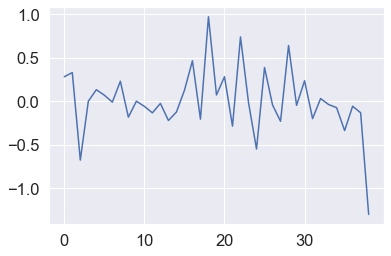

In [161]:
lr.coef_.shape
plt.plot(lr.coef_[0])

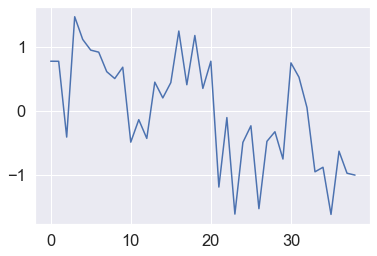

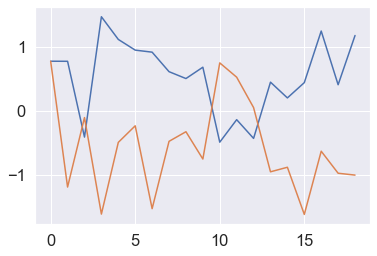

In [160]:
plt.plot(lr2.coef_[0])
plt.show()
plt.plot(lr2.coef_[0,0:19])
plt.plot(lr2.coef_[0,20:39])

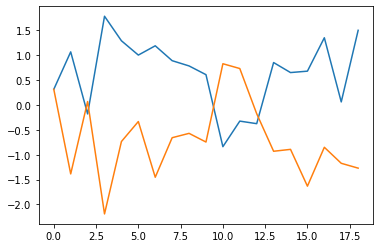

In [50]:
plt.plot(lr2.coef_[0,0:19])
plt.plot(lr2.coef_[0,20:39])


In [264]:
print(X_scaled)

[[-1.38091118  1.34029405 -0.31351236 ...  0.35770774 -0.58997677
   0.54423227]
 [ 0.339255    0.92308189  1.4580073  ...  0.64339779  0.49607826
   1.97602996]
 [-1.38091118  0.45371822  0.49454924 ... -0.07082732 -1.40451803
  -0.44012864]
 ...
 [-0.80752245  0.1408091  -0.81078104 ... -1.07074248  0.2245645
  -1.06654013]
 [ 0.91264372 -0.22425153 -0.77970174 ...  0.21486272  0.36032138
   0.66951457]
 [ 0.339255   -0.11994849 -0.1581159  ... -1.07074248  0.08880762
  -0.24325646]]


In [152]:
ds_normal = dataset.apply(lambda x: print(type(x)), axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [168]:
ds_normal.shape

(82,)

In [174]:
print(dataset[names])

KeyError: "None of [Index(['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM'], dtype='object')] are in the [columns]"

In [182]:
dataset.columns

Index([  'Totals',       'GP',      'MPG',      'FGM',      'FGA',      'FG%',
            '3PM',      '3PA',      '3P%',      'FTM',      'FTA',      'FT%',
            'TOV',       'PF',      'ORB',      'DRB',      'TRB',      'APG',
            'SPG',      'BPG',      'PPG',     'o-GP',    'o-MPG',    'o-FGM',
          'o-FGA',    'o-FG%',    'o-3PM',    'o-3PA',    'o-3P%',    'o-FTM',
          'o-FTA',    'o-FT%',    'o-TOV',     'o-PF',    'o-ORB',    'o-DRB',
          'o-TRB',    'o-APG',    'o-SPG',    'o-BPG',    'o-PPG', 'Playoffs',
                3,          4,          5,          6,          7,          8,
                9,         10,         11,         12,         13,         14,
               15,         16,         17,         18,         19,         20,
               21,         22,         23,         24,         25,         26,
               27,         28,         29,         30,         31,         32,
               33,         34,         35,         3

In [184]:
Y.size

300

In [185]:
Y_train.size

240

In [186]:
X_train.size

9360

In [187]:
X_train.shape

(240, 39)

In [188]:
X_train[0]

array([ 48.1  ,  40.7  ,  82.8  ,   0.492,   8.9  ,  21.6  ,   0.412,
        19.9  ,  25.8  ,   0.77 ,  14.8  ,  20.9  ,  11.1  ,  31.9  ,
        43.   ,  23.3  ,   5.8  ,   5.1  , 110.2  ,  82.   ,  48.1  ,
        39.5  ,  87.4  ,   0.452,   6.8  ,  19.3  ,   0.355,  19.6  ,
        25.8  ,   0.76 ,  13.   ,  21.8  ,  13.2  ,  29.2  ,  42.3  ,
        20.8  ,   7.9  ,   4.5  , 105.3  ])

In [190]:
stat_names = dataset.columns
stat_names

Index([  'Totals',       'GP',      'MPG',      'FGM',      'FGA',      'FG%',
            '3PM',      '3PA',      '3P%',      'FTM',      'FTA',      'FT%',
            'TOV',       'PF',      'ORB',      'DRB',      'TRB',      'APG',
            'SPG',      'BPG',      'PPG',     'o-GP',    'o-MPG',    'o-FGM',
          'o-FGA',    'o-FG%',    'o-3PM',    'o-3PA',    'o-3P%',    'o-FTM',
          'o-FTA',    'o-FT%',    'o-TOV',     'o-PF',    'o-ORB',    'o-DRB',
          'o-TRB',    'o-APG',    'o-SPG',    'o-BPG',    'o-PPG', 'Playoffs',
                3,          4,          5,          6,          7,          8,
                9,         10,         11,         12,         13,         14,
               15,         16,         17,         18,         19,         20,
               21,         22,         23,         24,         25,         26,
               27,         28,         29,         30,         31,         32,
               33,         34,         35,         3